In [1]:
!date

Sun Mar  1 19:25:42 PST 2020


# Basic plots

In [1]:
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import scanpy as scanp
from scipy.stats import ks_2samp, ttest_ind
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/home/sina/projects/mop/BYVSTZP_2020/trackfig')
from trackfig.utils import get_notebook_name
from trackfig.trackfig import trackfig 

TRACKFIG = "/home/sina/projects/mop/BYVSTZP_2020/trackfig.txt"
NB = get_notebook_name()

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [2]:
isoform = anndata.read_h5ad("../../data/notebook/revision/isoform.h5ad")
gene =    anndata.read_h5ad("../../data/notebook/revision/gene.h5ad")

In [3]:
cluster_cmap = {
"Astro": (0.38823529411764707, 0.4745098039215686,  0.2235294117647059 ),  # 637939,
"Endo" : (0.5490196078431373,  0.6352941176470588,  0.3215686274509804 ),  # 8ca252,
"SMC"  : (0.7098039215686275,  0.8117647058823529,  0.4196078431372549 ),  # b5cf6b,
"VLMC" : (0.807843137254902,   0.8588235294117647,  0.611764705882353  ),  # cedb9c,
"Low Quality" : (0,0,0),
"L2/3 IT" : (0.9921568627450981,  0.6823529411764706,  0.4196078431372549  ),  # fdae6b
"L5 PT" : (0.9921568627450981,  0.8156862745098039,  0.6352941176470588  ),  # fdd0a2
"L5 IT" : (0.5176470588235295,  0.23529411764705882, 0.2235294117647059 ),  # 843c39
"L5/6 NP": "#D43F3A",
"L6 CT" : (0.8392156862745098,  0.3803921568627451,  0.4196078431372549 ),  # d6616b
"L6 IT" : (0.9058823529411765,  0.5882352941176471,  0.611764705882353  ),  # e7969c
"L6b" : (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
"L6 IT Car3" : (1.0,                 0.7333333333333333,  0.47058823529411764 ),  # ffbb78
"Lamp5" : (0.19215686274509805, 0.5098039215686274,  0.7411764705882353  ),  # 3182bd # blues
"Sncg" : (0.4196078431372549,  0.6823529411764706,  0.8392156862745098  ),  # 6baed6
"Vip" : (0.6196078431372549,  0.792156862745098,   0.8823529411764706  ),  # 9ecae1
"Sst" : (0.7764705882352941,  0.8588235294117647,  0.9372549019607843  ),  # c6dbef
"Pvalb":(0.7372549019607844,  0.7411764705882353,  0.8627450980392157  ),  # bcbddc
}

cluster_order = [
    "Lamp5",
    "Sncg",
    "Vip",
    "Sst",
    "Pvalb",
    "L5 IT",
    "L5/6 NP",
    "L5 PT",
    "L2/3 IT",
    "L6b",
    "VLMC",
    "L6 IT",
    "L6 CT",
    "L6 IT Car3",
    "Endo",
    "Astro",
    "SMC",
    "Low Quality"
]

# Annotate clusters

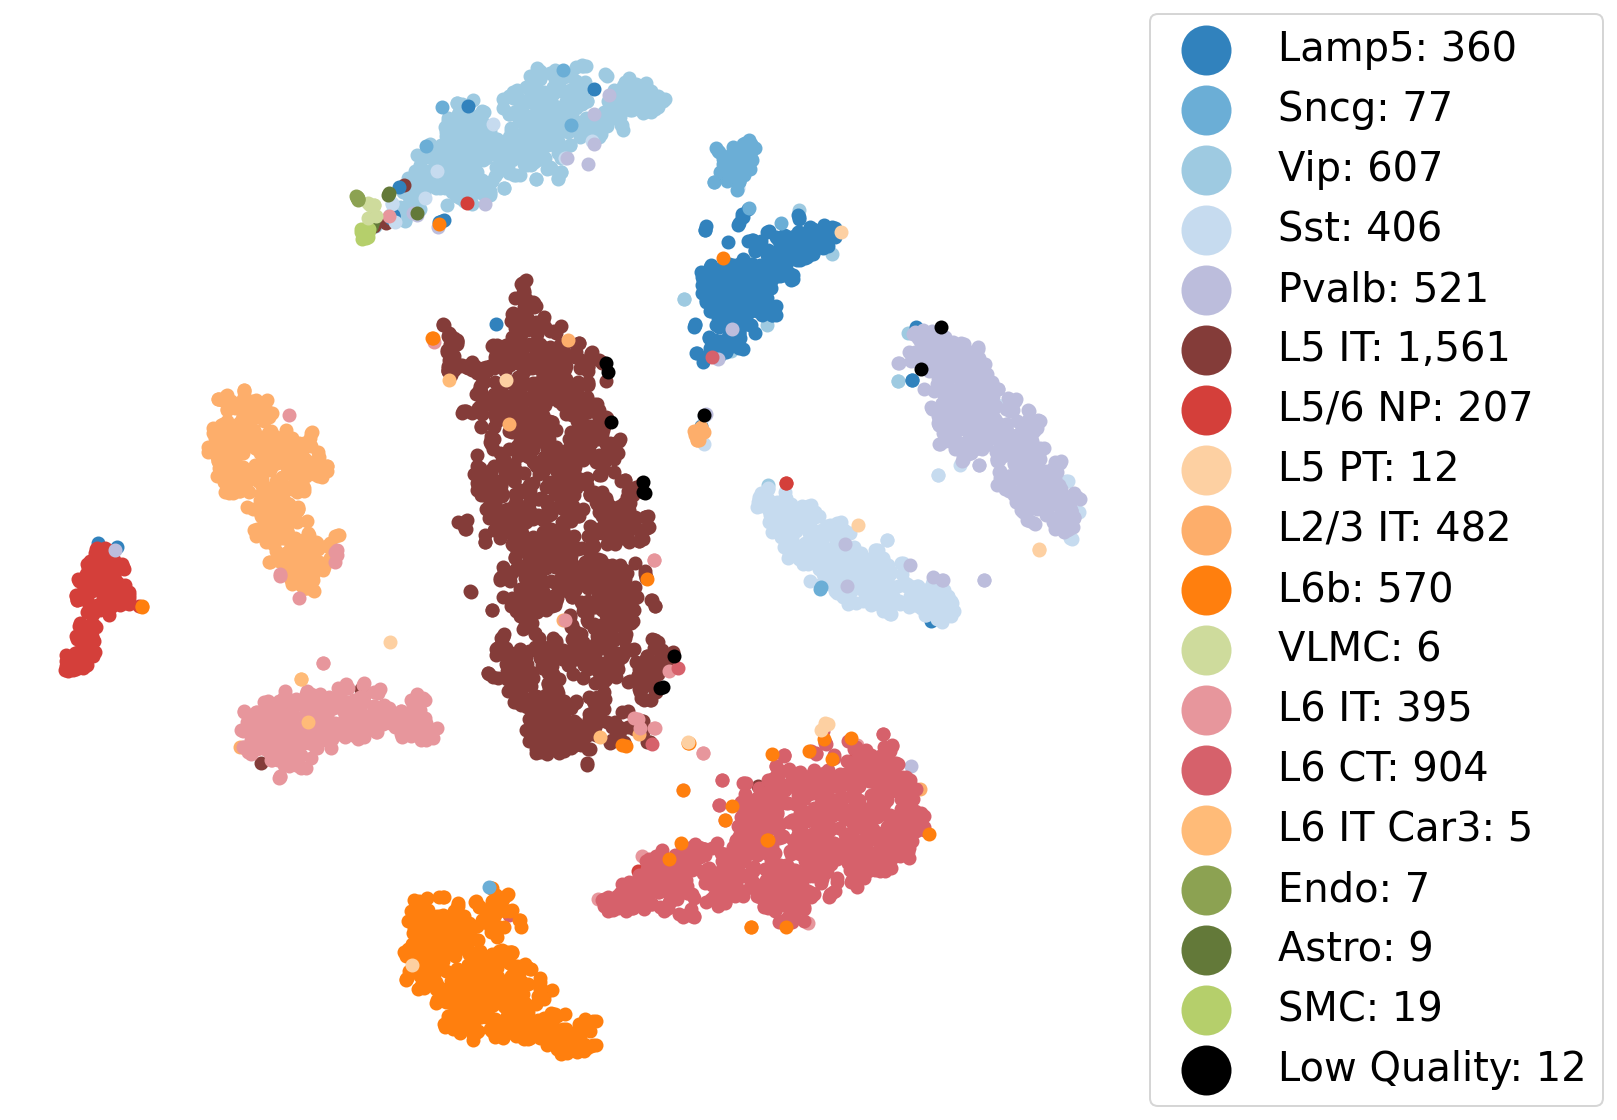

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

c = isoform.obs["subclass_label"].unique().astype(str)
cmap = cm.get_cmap("tab20")

for idx, cluster in enumerate(c):
    XX = isoform[isoform.obs.subclass_label == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    
    color = cluster_cmap[cluster]
    
    ax.scatter(x, y, color = color, label=cluster+": {:,}".format(x.shape[0]))
    # if cluster == "Endo": y = y-5; x=x+5
    # if cluster == "SMC": y = y+5; x=x+2
    # if cluster == "VLMC": x=x-20; y=y-5
    # if cluster == "L6 IT Car3": x = x+10;y=y-20
    # if cluster == "Astro": x=x-10;y=y-10
    # if cluster == "Sncg": x = x+5; y = y-5
    # ax.annotate(cluster, 
    #          (np.mean(x), np.mean(y)),
    #          horizontalalignment='center',
    #          verticalalignment='center',
    #          size=15, weight='bold',
    #          color="white",
    #            backgroundcolor=color) 
    

handles, labels = ax.get_legend_handles_labels()
idx = [np.where(c==i)[0][0] for i in cluster_order]
handles = np.array(handles)[idx]
labels=np.array(labels)[idx]

ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()

plt.savefig(trackfig("../../figures/isoform_subclass_tsne_nca.png", TRACKFIG, NB),bbox_inches='tight', dpi=300)


plt.show()

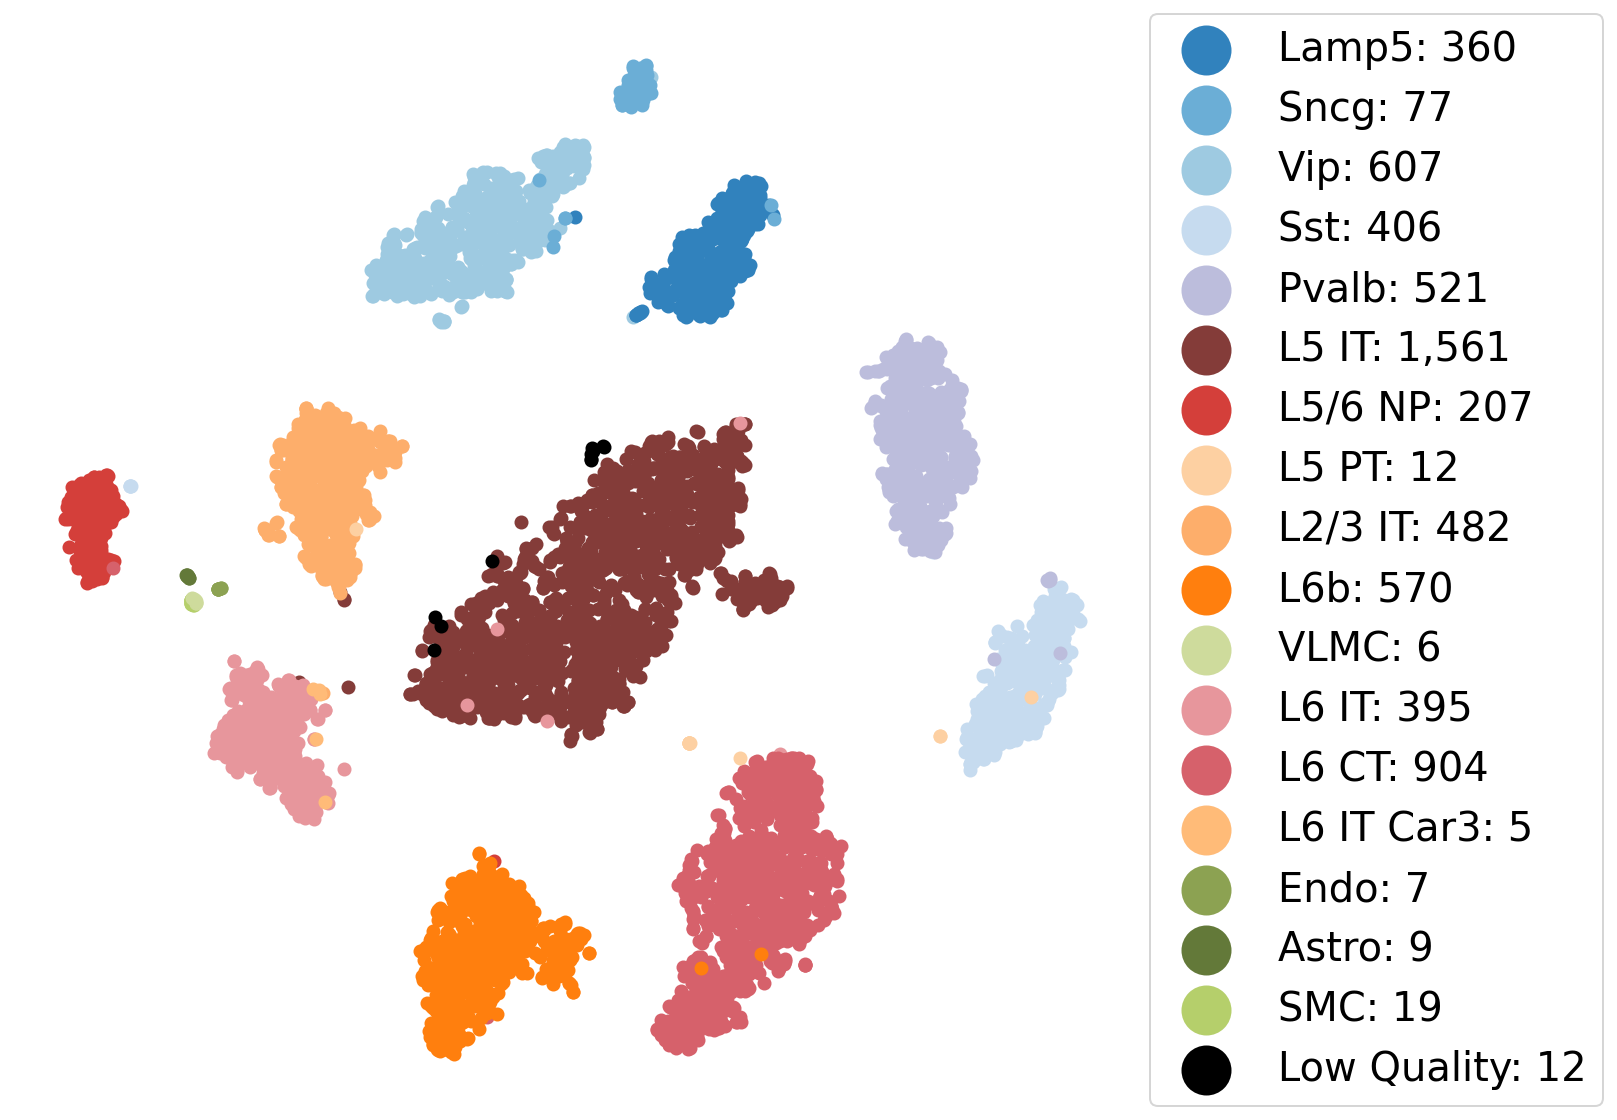

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["subclass_label"].unique().astype(str)
cmap = cm.get_cmap("tab20")

for idx, cluster in enumerate(c):
    XX = gene[gene.obs.subclass_label == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    
    color = cluster_cmap[cluster]
    
    ax.scatter(x, y, color = color, label=cluster+": {:,}".format(x.shape[0]))
    # if cluster == "Endo": y = y-5; x=x+5
    # if cluster == "SMC": y = y+5; x=x+2
    # if cluster == "VLMC": x=x-20; y=y-5
    # if cluster == "L6 IT Car3": x = x+10;y=y-20
    # if cluster == "Astro": x=x-10;y=y-10
    # if cluster == "Sncg": x = x+5; y = y-5
    # ax.annotate(cluster, 
    #          (np.mean(x), np.mean(y)),
    #          horizontalalignment='center',
    #          verticalalignment='center',
    #          size=15, weight='bold',
    #          color="white",
    #            backgroundcolor=color) 
    

handles, labels = ax.get_legend_handles_labels()
idx = [np.where(c==i)[0][0] for i in cluster_order]
handles = np.array(handles)[idx]
labels=np.array(labels)[idx]

ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()

plt.savefig(trackfig("../../figures/gene_subclass_tsne_nca.png", TRACKFIG, NB),bbox_inches='tight', dpi=300)


plt.show()

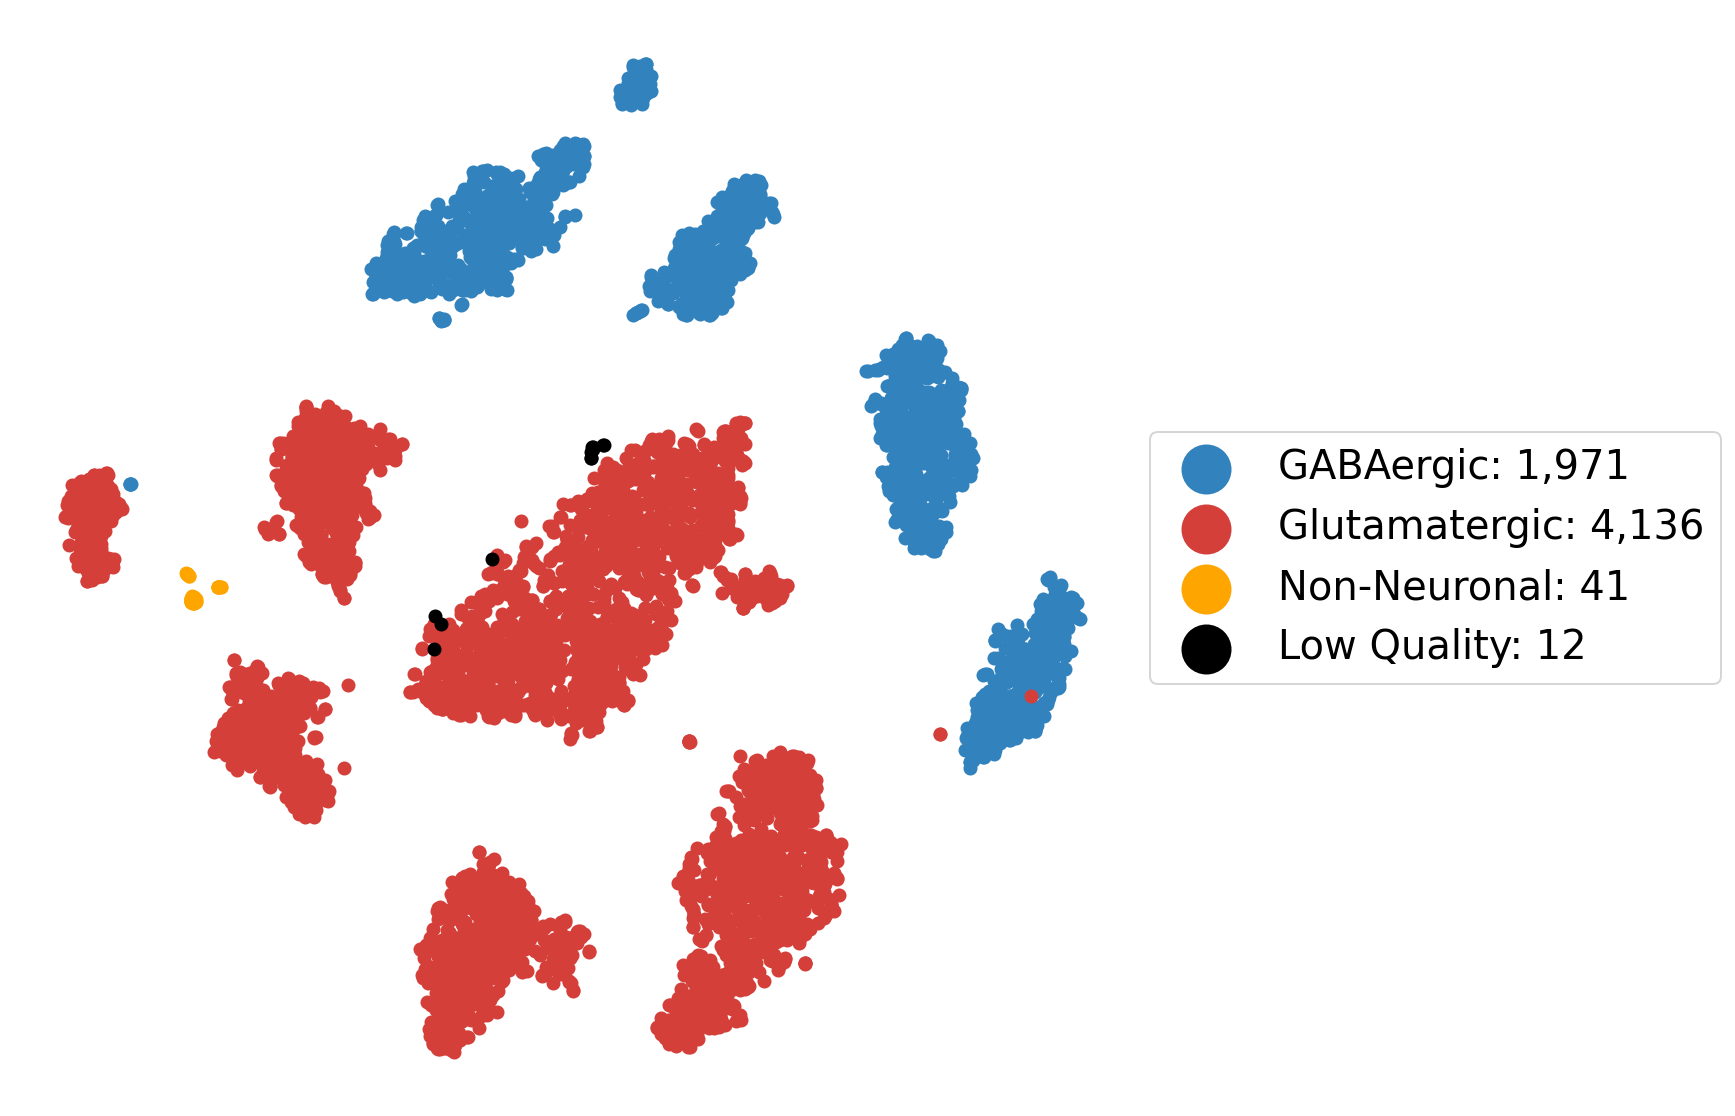

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["class_label"].unique()
cmap = cm.get_cmap("tab20")

for idx, cluster in enumerate(c):
    XX = gene[gene.obs.class_label == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    
    if cluster == "Low Quality": color ="black"
    if cluster == "Glutamatergic": color="#D43F3A"
    if cluster == "GABAergic": color="#3182bd"
    if cluster == "Non-Neuronal": color="orange"
    
    ax.scatter(x, y, color = color, label=cluster+": {:,}".format(x.shape[0]))
    # if cluster == "Non-Neuronal": y=y-10
    # ax.annotate(cluster, 
    #          (np.mean(x), np.mean(y)),
    #          horizontalalignment='center',
    #          verticalalignment='center',
    #          size=15, weight='bold',
    #          color="white",
    #            backgroundcolor=color) 
    

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()

plt.savefig(trackfig("../../figures/gene_class_tsne_nca.png", TRACKFIG, NB),bbox_inches='tight', dpi=300)

plt.show()

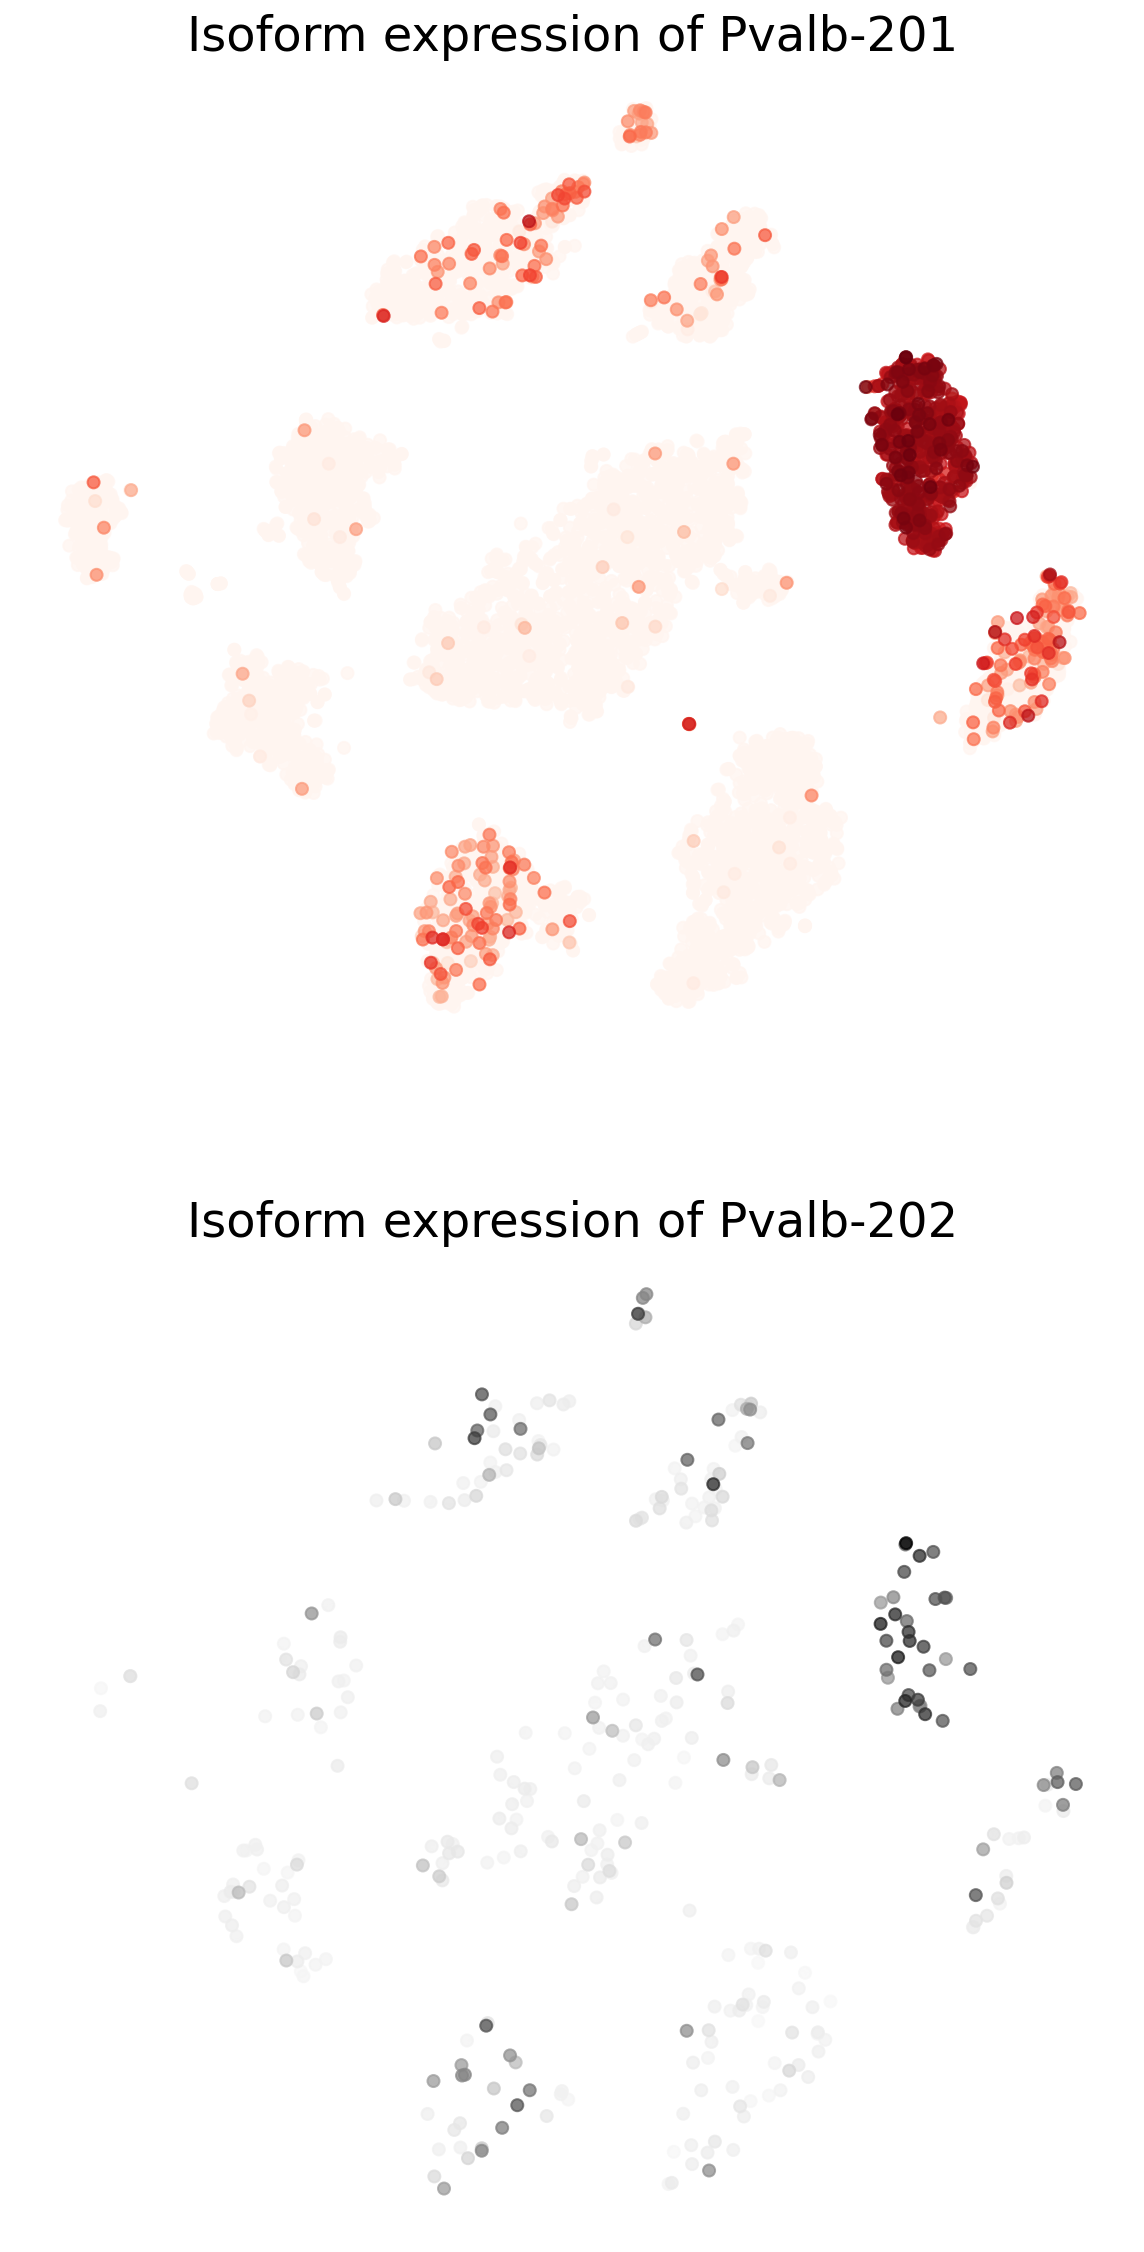

In [16]:
specific_gene = "Pvalb_ENSMUSG00000005716"
specific_isoform_1 = "Pvalb-201_ENSMUST00000005860"
specific_isoform_2 = "Pvalb-202_ENSMUST00000120592"
specific_cluster = "Pvalb"

complement_color = (0.8, 0.8, 0.8, 1.0)

fig, ax = plt.subplots(figsize=(10,20), nrows=2)


x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(isoform[:, isoform.var.transcript_name==specific_isoform_1].layers["log1p"].todense()).reshape(-1)

argsort = np.argsort(c)
x = x[argsort]
y = y[argsort]
c = c[argsort]

cmap="Reds"
alpha = 0.75
ax[0].set_title("Isoform expression of {}".format(specific_isoform_1.split("_")[0]))

ax[0].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[0].set_axis_off()


x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(isoform[:, isoform.var.transcript_name==specific_isoform_2].layers["log1p"].todense()).reshape(-1)

argsort = np.argsort(c)
x = x[argsort]
y = y[argsort]
c = c[argsort]

cmap="Greys"
alpha = 0.75
ax[1].set_title("Isoform expression of {}".format(specific_isoform_2.split("_")[0]))

ax[1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[1].set_axis_off()

plt.savefig(trackfig("../../figures/gene_tsne_nca_{}.png".format(specific_gene.split("_")[0]), TRACKFIG, NB),bbox_inches='tight', dpi=300)

plt.show()

# Louvain

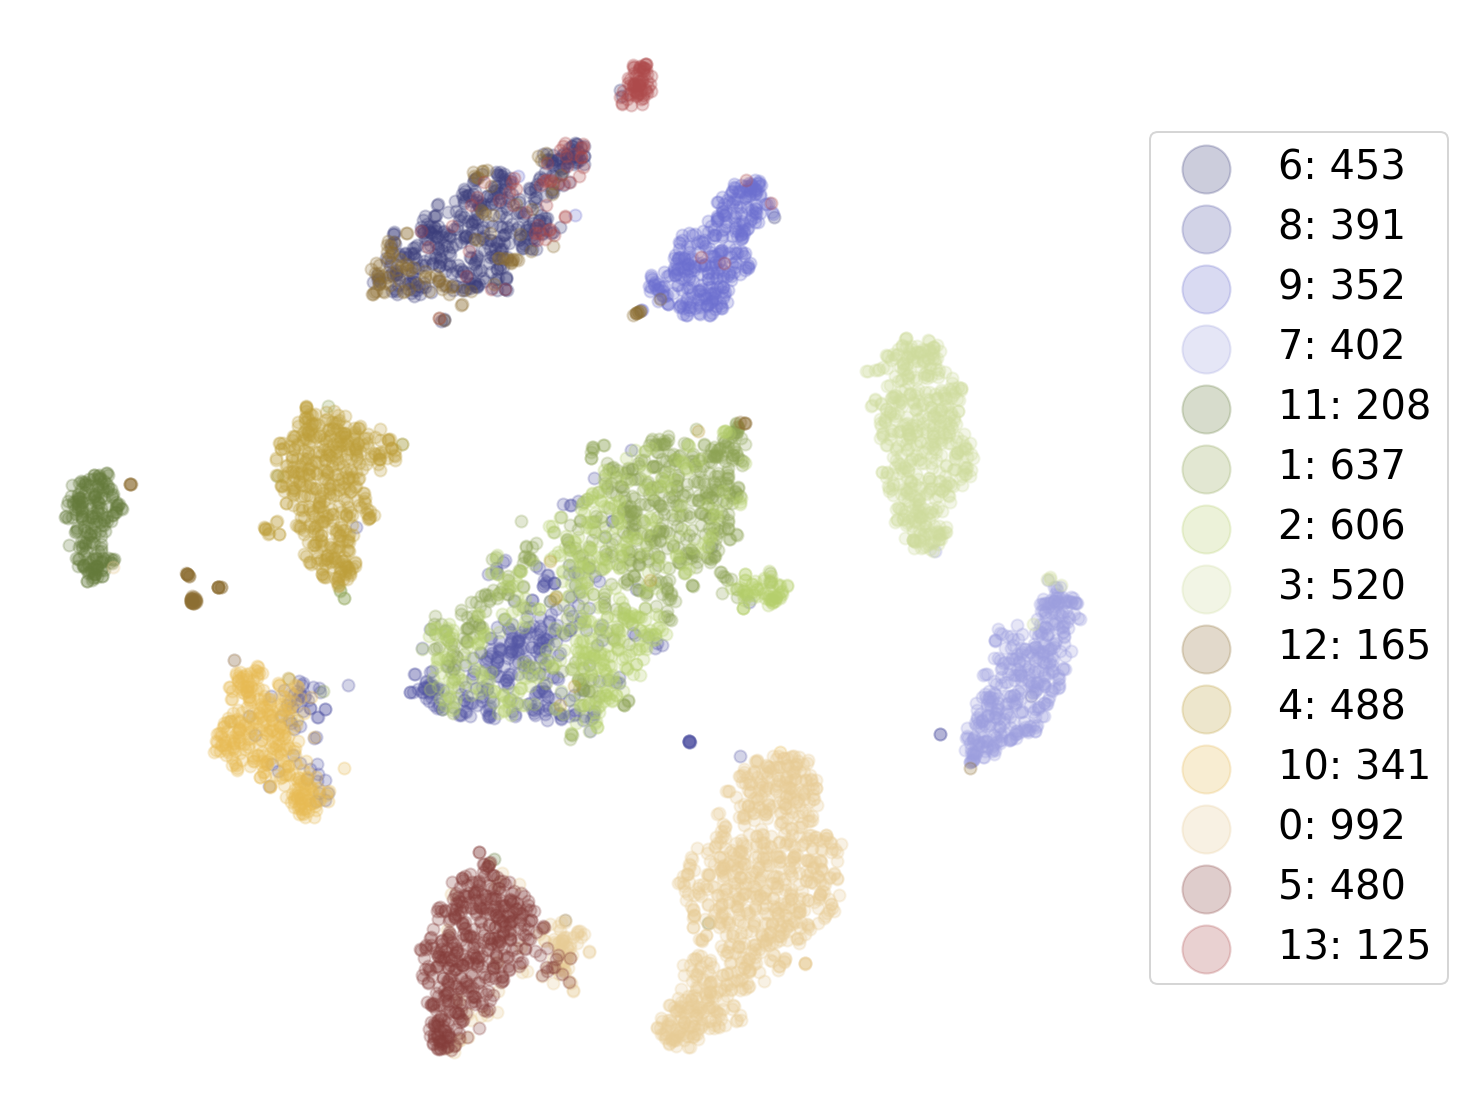

In [18]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["louvain"].unique().astype(str)
cmap = cm.get_cmap("tab20b")

for idx, cluster in enumerate(c):
    XX = gene[gene.obs.louvain == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    
    #color = cluster_cmap[cluster]
    
    ax.scatter(x, y, alpha=0.25, color=cmap(idx), label=cluster+": {:,}".format(x.shape[0]))
    # if cluster == "Endo": y = y-5; x=x+5
    # if cluster == "SMC": y = y+5; x=x+2
    # if cluster == "VLMC": x=x-20; y=y-5
    # if cluster == "L6 IT Car3": x = x+10;y=y-20
    # if cluster == "Astro": x=x-10;y=y-10
    # if cluster == "Sncg": x = x+5; y = y-5
    # ax.annotate(cluster, 
    #          (np.mean(x), np.mean(y)),
    #          horizontalalignment='center',
    #          verticalalignment='center',
    #          size=15, weight='bold',
    #          color="white",
    #            backgroundcolor=color) 
    

#handles, labels = ax.get_legend_handles_labels()
#idx = [np.where(c==i)[0][0] for i in cluster_order]
#handles = np.array(handles)[idx]
#labels=np.array(labels)[idx]

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()

plt.savefig(trackfig("../../figures/gene_tsne_nca_louvain.png", TRACKFIG, NB),bbox_inches='tight', dpi=300)


plt.show()

In [19]:
gene

AnnData object with n_obs × n_vars = 6160 × 19190
    obs: 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'cluster_color', 'size', 'cell_id', 'subclass_id', 'class_id', 'cell_counts', 'percent_mito', 'n_genes', 'pass_count_filter', 'leiden', 'louvain'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length', 'txn_list', 'num_isoforms', 'gene_counts', 'dispersion', 'pass_disp_filter', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'louvain', 'neighbors'
    obsm: 'X_nca', 'X_nca_tsne', 'X_pca', 'X_pca_tsne'
    layers: 'X', 'log1p', 'norm'
    obsp: 'connectivities', 'distances'

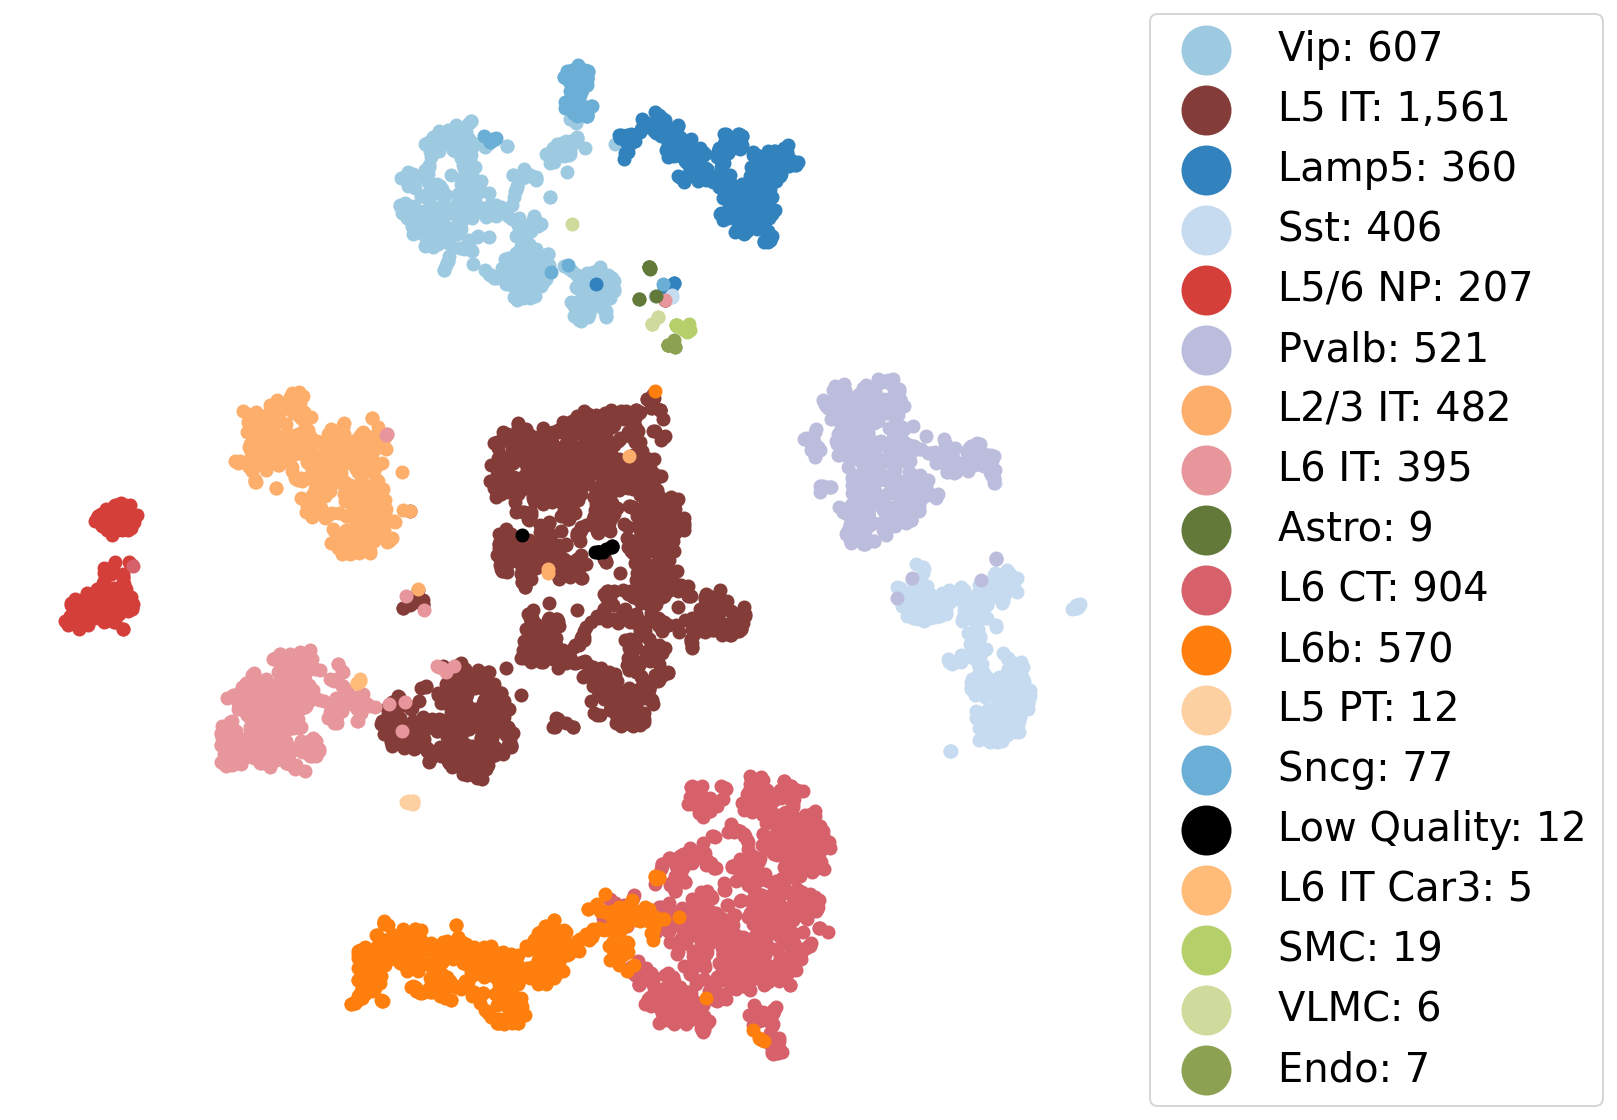

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["subclass_label"].unique().astype(str)
cmap = cm.get_cmap("tab20b")

for idx, cluster in enumerate(c):
    XX = gene[gene.obs.subclass_label == cluster,:].obsm["X_pca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    
    color = cluster_cmap[cluster]
    
    ax.scatter(x, y, color=color, label=cluster+": {:,}".format(x.shape[0]))
    # if cluster == "Endo": y = y-5; x=x+5
    # if cluster == "SMC": y = y+5; x=x+2
    # if cluster == "VLMC": x=x-20; y=y-5
    # if cluster == "L6 IT Car3": x = x+10;y=y-20
    # if cluster == "Astro": x=x-10;y=y-10
    # if cluster == "Sncg": x = x+5; y = y-5
    # ax.annotate(cluster, 
    #          (np.mean(x), np.mean(y)),
    #          horizontalalignment='center',
    #          verticalalignment='center',
    #          size=15, weight='bold',
    #          color="white",
    #            backgroundcolor=color) 
    

#handles, labels = ax.get_legend_handles_labels()
#idx = [np.where(c==i)[0][0] for i in cluster_order]
#handles = np.array(handles)[idx]
#labels=np.array(labels)[idx]

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()

plt.savefig(trackfig("../../figures/gene_subclass_tsne_pca.png", TRACKFIG, NB),bbox_inches='tight', dpi=300)


plt.show()

# Umap

In [21]:
umap = UMAP()

In [22]:
%%time
X = umap.fit_transform(gene.obsm["X_pca"])

CPU times: user 2min 54s, sys: 4.88 s, total: 2min 59s
Wall time: 2min 17s


In [23]:
gene.obsm["X_umap"] = X

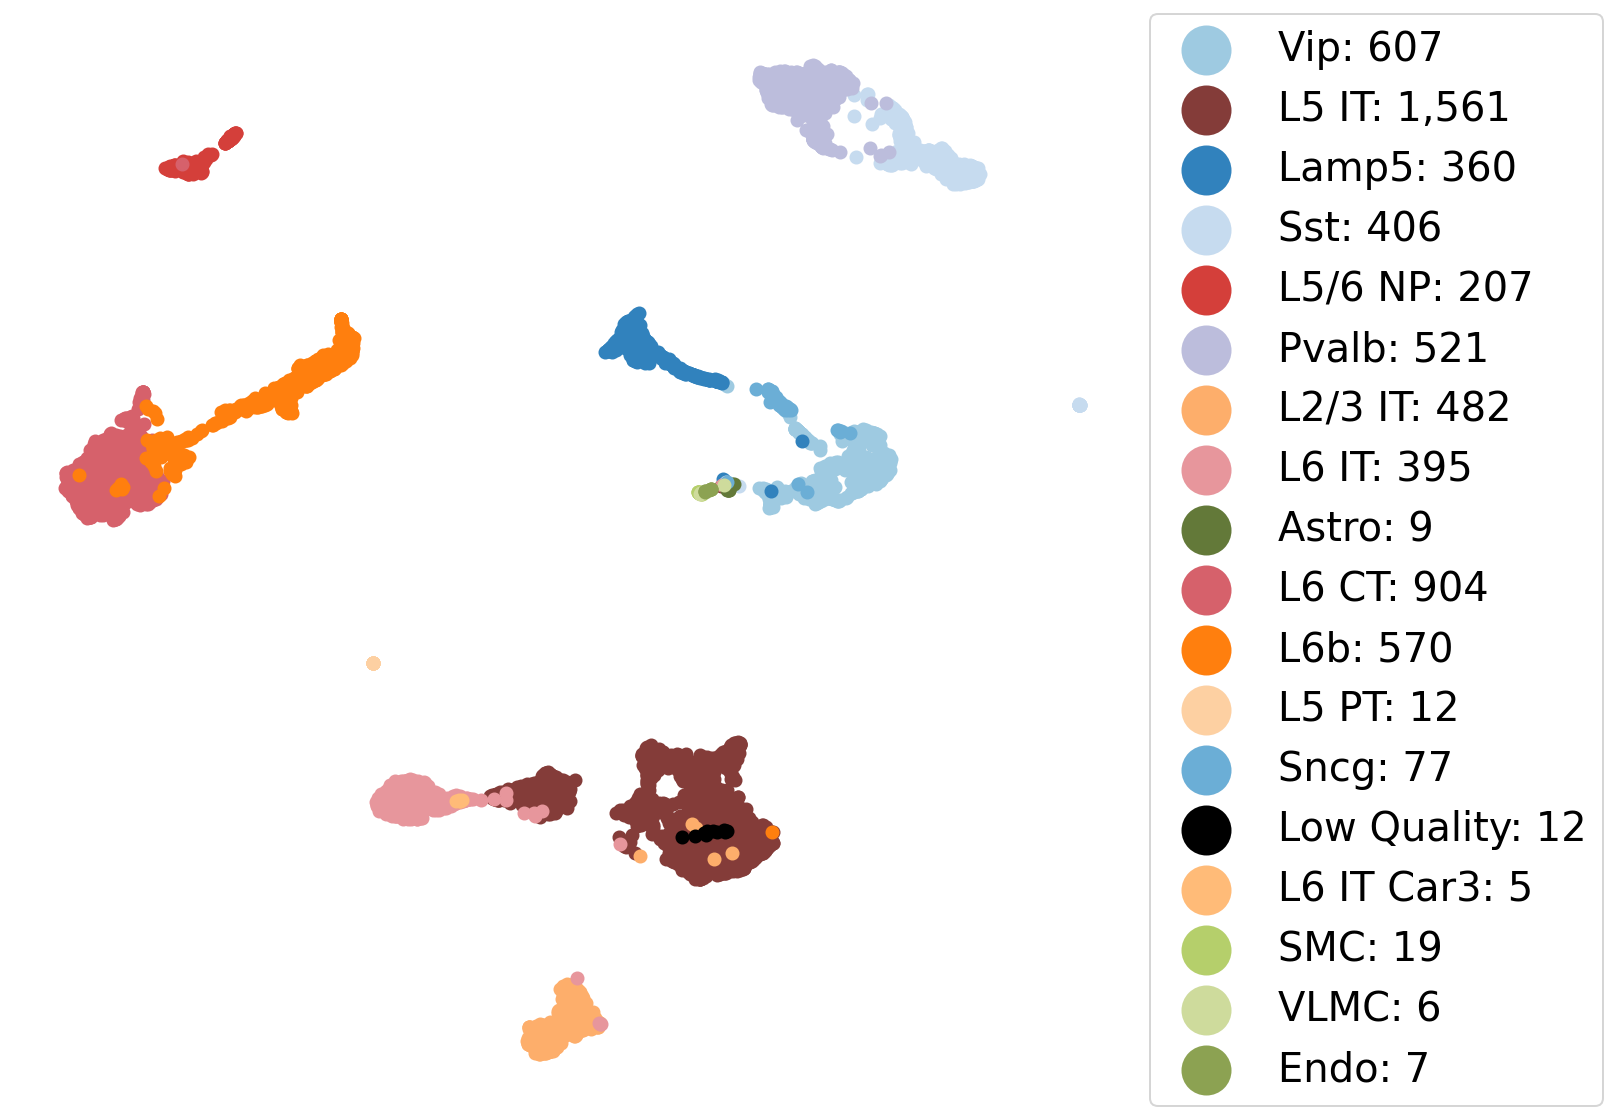

In [24]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["subclass_label"].unique().astype(str)
cmap = cm.get_cmap("tab20b")

for idx, cluster in enumerate(c):
    XX = gene[gene.obs.subclass_label == cluster,:].obsm["X_umap"]
    
    x = XX[:,0]
    y = XX[:,1]
    
    color = cluster_cmap[cluster]
    
    ax.scatter(x, y, color=color, label=cluster+": {:,}".format(x.shape[0]))
    # if cluster == "Endo": y = y-5; x=x+5
    # if cluster == "SMC": y = y+5; x=x+2
    # if cluster == "VLMC": x=x-20; y=y-5
    # if cluster == "L6 IT Car3": x = x+10;y=y-20
    # if cluster == "Astro": x=x-10;y=y-10
    # if cluster == "Sncg": x = x+5; y = y-5
    # ax.annotate(cluster, 
    #          (np.mean(x), np.mean(y)),
    #          horizontalalignment='center',
    #          verticalalignment='center',
    #          size=15, weight='bold',
    #          color="white",
    #            backgroundcolor=color) 
    

#handles, labels = ax.get_legend_handles_labels()
#idx = [np.where(c==i)[0][0] for i in cluster_order]
#handles = np.array(handles)[idx]
#labels=np.array(labels)[idx]

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()

plt.savefig(trackfig("../../figures/gene_subclass_umap_pca.png", TRACKFIG, NB),bbox_inches='tight', dpi=300)


plt.show()

In [25]:
umap = UMAP()

In [26]:
%%time
X = umap.fit_transform(gene.obsm["X_nca"])

CPU times: user 2min 2s, sys: 3.5 s, total: 2min 5s
Wall time: 1min 23s


In [27]:
gene.obsm["X_nca_umap"] = X

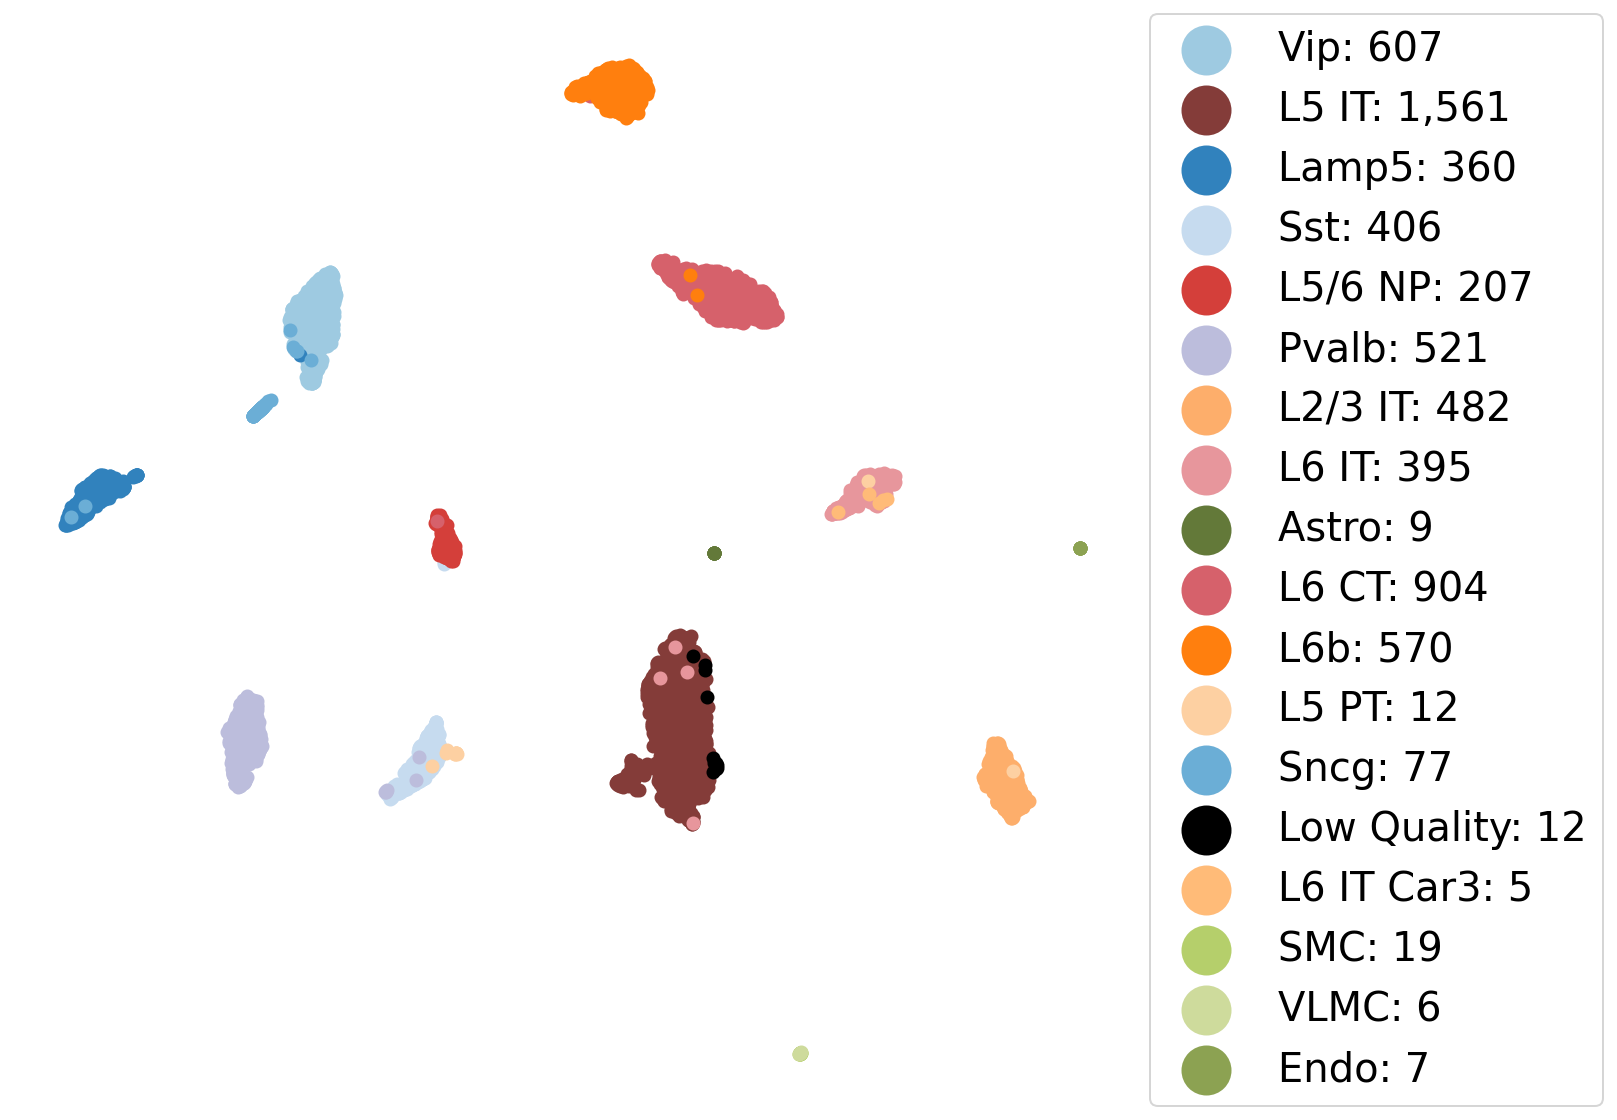

In [28]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["subclass_label"].unique().astype(str)
cmap = cm.get_cmap("tab20b")

for idx, cluster in enumerate(c):
    XX = gene[gene.obs.subclass_label == cluster,:].obsm["X_nca_umap"]
    
    x = XX[:,0]
    y = XX[:,1]
    
    color = cluster_cmap[cluster]
    
    ax.scatter(x, y, color=color, label=cluster+": {:,}".format(x.shape[0]))
    # if cluster == "Endo": y = y-5; x=x+5
    # if cluster == "SMC": y = y+5; x=x+2
    # if cluster == "VLMC": x=x-20; y=y-5
    # if cluster == "L6 IT Car3": x = x+10;y=y-20
    # if cluster == "Astro": x=x-10;y=y-10
    # if cluster == "Sncg": x = x+5; y = y-5
    # ax.annotate(cluster, 
    #          (np.mean(x), np.mean(y)),
    #          horizontalalignment='center',
    #          verticalalignment='center',
    #          size=15, weight='bold',
    #          color="white",
    #            backgroundcolor=color) 
    

#handles, labels = ax.get_legend_handles_labels()
#idx = [np.where(c==i)[0][0] for i in cluster_order]
#handles = np.array(handles)[idx]
#labels=np.array(labels)[idx]

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()

plt.savefig(trackfig("../../figures/gene_umap_nca.png", TRACKFIG, NB),bbox_inches='tight', dpi=300)


plt.show()

In [29]:
gene

AnnData object with n_obs × n_vars = 6160 × 19190
    obs: 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'cluster_color', 'size', 'cell_id', 'subclass_id', 'class_id', 'cell_counts', 'percent_mito', 'n_genes', 'pass_count_filter', 'leiden', 'louvain'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length', 'txn_list', 'num_isoforms', 'gene_counts', 'dispersion', 'pass_disp_filter', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'louvain', 'neighbors'
    obsm: 'X_nca', 'X_nca_tsne', 'X_pca', 'X_pca_tsne', 'X_umap', 'X_nca_umap'
    layers: 'X', 'log1p', 'norm'
    obsp: 'connectivities', 'distances'

In [30]:
gene.obs.cluster_label.nunique()

62

In [31]:
gene.obs[~gene.obs.cluster_label.str.contains("L5 IT")].cluster_label.nunique()

54

In [32]:
isoform.var[isoform.var.transcript_name.str.contains("Pvalb")]

,transcript_id,gene_id,gene_name,transcript_name,length,gene_counts,highly_variable,means,dispersions,dispersions_norm
Pvalb-201_ENSMUST00000005860,ENSMUST00000005860,ENSMUSG00000005716,Pvalb_ENSMUSG00000005716,Pvalb-201_ENSMUST00000005860,977,1.455166e+06,True,5.438827,8.035224,5.644293
Pvalb-202_ENSMUST00000120592,ENSMUST00000120592,ENSMUSG00000005716,Pvalb_ENSMUSG00000005716,Pvalb-202_ENSMUST00000120592,953,1.970658e+03,False,0.241709,3.172018,0.473971


# Knee plot

In [5]:
isoform.layers

Layers with keys: X, log1p, norm

In [8]:
def nd(arr):
    return np.array(arr).reshape(-1)

In [25]:
x = nd(isoform.layers["norm"].sum(axis=1))

In [21]:
import matplotlib.ticker as mtick

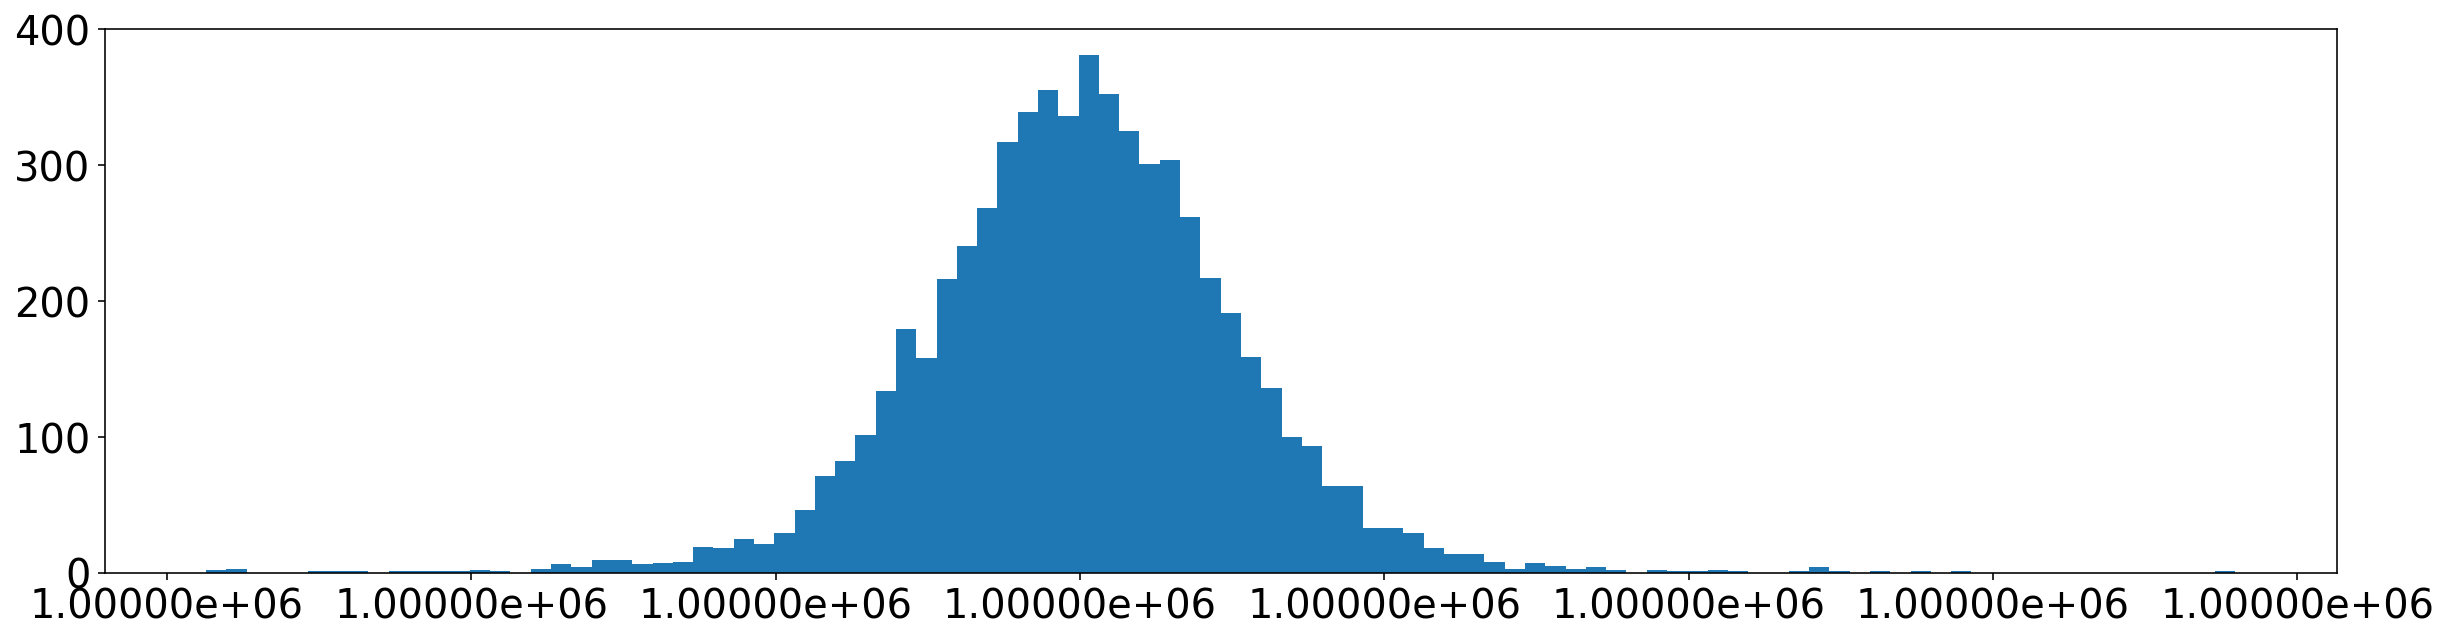

In [29]:
fig, ax = plt.subplots(figsize=(20,5))


ax.hist(x, bins=100)
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.5e'))

fig.show()

In [49]:
# Normalized by counts per cell

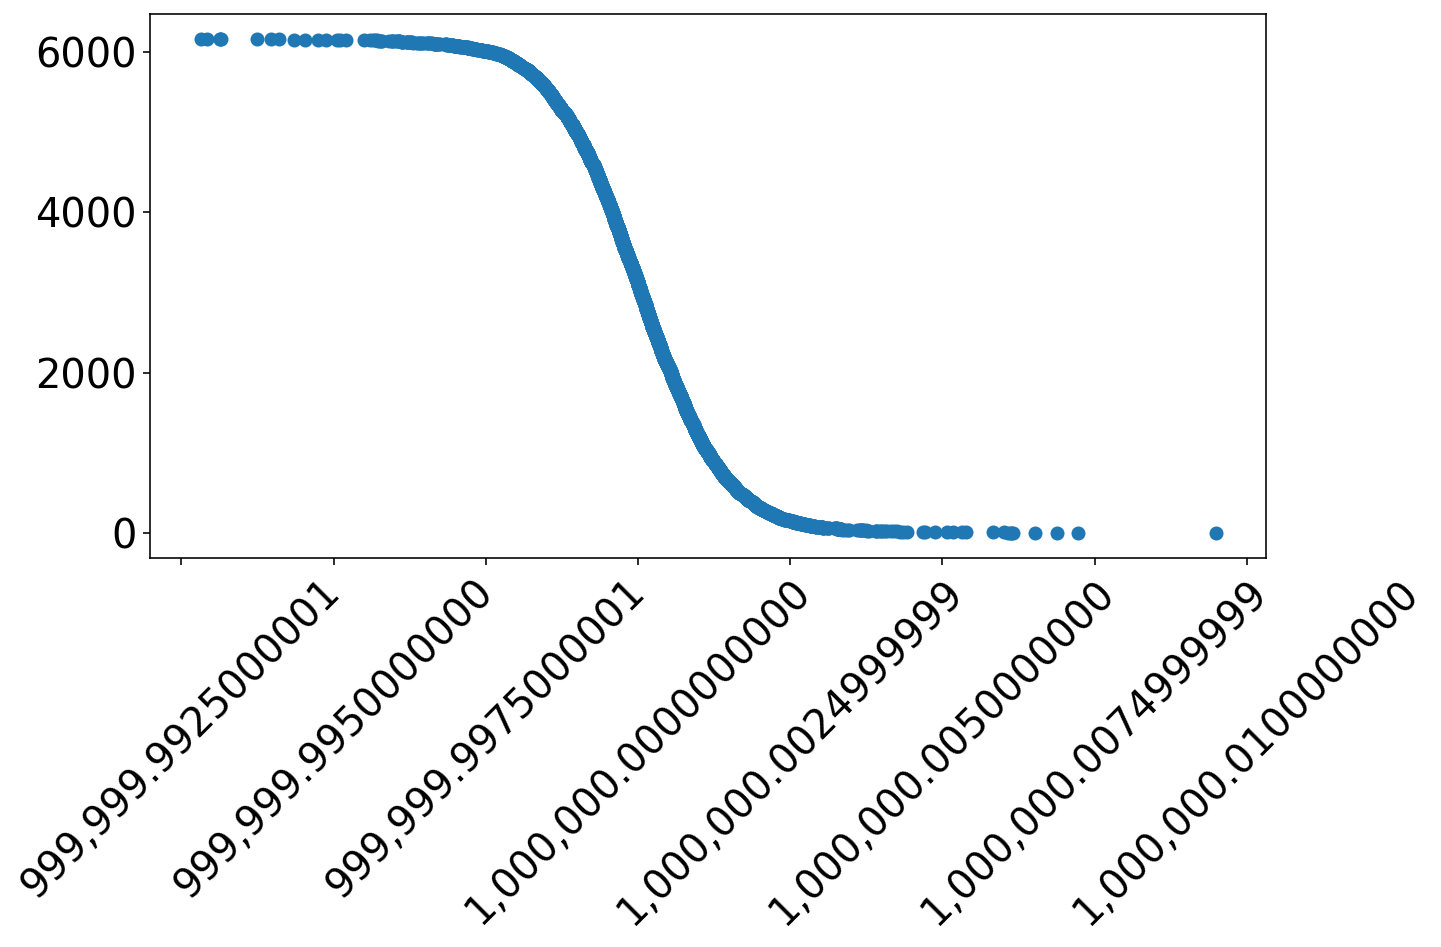

In [48]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(np.sort(x)[::-1], np.arange(x.shape[0]))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.10f}'))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

fig.show()